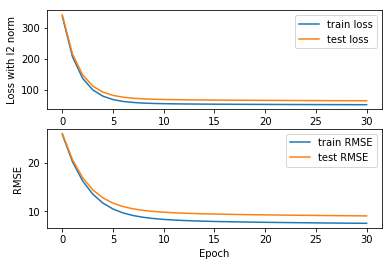

In [40]:
# write your code here#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Dec  2 09:58:38 2017

@author: wty
"""
import numpy as np 
import scipy  
import matplotlib.pyplot as plt

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

import LinearRegressor

data = load_svmlight_file("./resources/housing_scale.txt")
# add interception
X = scipy.sparse.hstack(\
    (scipy.sparse.csr_matrix(np.ones((len(data[1]),1))),data[0]))
Y = data[1].reshape((len(data[1]),1))

num_records,num_features  = np.shape(X) 

X_train, X_test, Y_train, Y_test = train_test_split(\
X, Y, test_size=0.33,random_state=5)
Y_train = Y_train.reshape((len(Y_train),1))
Y_test = Y_test.reshape((len(Y_test),1))

# initialize w
init_w = np.random.normal(size=(num_features,1))

lamda = 0.5
eta = 0.05
max_iterate = 30

regressor = LinearRegressor.LinearRegressor(init_w,lamda,eta,max_iterate)
regressor.fit(X_train,Y_train)
loss_train = regressor.getLossHistory(X_train,Y_train)
loss_test = regressor.getLossHistory(X_test,Y_test)
RMSE_train = [-s for s in regressor.getScoreHistory(X_train,Y_train)]
RMSE_test = [-s for s in regressor.getScoreHistory(X_test,Y_test)]
    
plt.subplot(211)
train_loss_line = plt.plot(range(max_iterate+1),loss_train,label='train loss')
test_loss_line = plt.plot(range(max_iterate+1),loss_test,label='test loss')
ax=plt.gca()
ax.set(xlabel='Epoch', ylabel='Loss with l2 norm')
plt.legend()

plt.subplot(212)
train_RMSE_line = plt.plot(range(max_iterate+1),RMSE_train,label='train RMSE')
test_RMSE_line = plt.plot(range(max_iterate+1),RMSE_test,label='test RMSE')
ax=plt.gca()
ax.set(xlabel='Epoch', ylabel='RMSE')
plt.legend()

plt.show()
